In [47]:
# Import modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
# Import statmdoels for timeseries

import statsmodels.api as sm

In [5]:
# Set parameters for plot

plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['text.color'] = 'k'

In [22]:
# Import Superstore data into pandas dataframe

df = pd.read_excel('D:/Study/DataScience/TimeSeries/superstore.xls')

In [23]:
df['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [24]:
# Select the dataset containing only furniture category

furniture = df[df['Category'] == 'Furniture']

In [25]:
# Checking the date range for the furniture sale by latest and oldest sales date

print(furniture['Order Date'].min())

print(furniture['Order Date'].max())

2014-01-06 00:00:00
2017-12-30 00:00:00


In [26]:
# Removing the columns which are not required

cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']

furniture.drop(columns= cols, axis = 1, inplace= True)

In [27]:
furniture.head()

,Order Date,Sales
0,2016-11-08,261.9600
1,2016-11-08,731.9400
3,2015-10-11,957.5775
5,2014-06-09,48.8600
10,2014-06-09,1706.1840


In [28]:
# Sort Values as per order date

furniture.sort_values('Order Date')

,Order Date,Sales
7474,2014-01-06,2573.8200
7660,2014-01-07,76.7280
866,2014-01-10,51.9400
716,2014-01-11,9.9400
2978,2014-01-13,545.9400
4938,2014-01-13,333.9990
6474,2014-01-14,61.9600
970,2014-01-16,127.1040
5465,2014-01-19,181.4700
6327,2014-01-20,272.9400


In [29]:
# Checking for null values

furniture.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [30]:
# Group by the order date and calculate the sum of sales as per date

furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()

In [31]:
# Index as per order date

furniture = furniture.set_index('Order Date')

In [32]:
furniture.index

DatetimeIndex(['2014-01-06', '2014-01-07', '2014-01-10', '2014-01-11',
               '2014-01-13', '2014-01-14', '2014-01-16', '2014-01-19',
               '2014-01-20', '2014-01-21',
               ...
               '2017-12-18', '2017-12-19', '2017-12-21', '2017-12-22',
               '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=889, freq=None)

In [33]:
# since the daily dates are not present. Lets use the monthly average sales data for analysis.

y = furniture['Sales'].resample('MS').mean()

In [35]:
y['2017':]

Order Date
2017-01-01     397.602133
2017-02-01     528.179800
2017-03-01     544.672240
2017-04-01     453.297905
2017-05-01     678.302328
2017-06-01     826.460291
2017-07-01     562.524857
2017-08-01     857.881889
2017-09-01    1209.508583
2017-10-01     875.362728
2017-11-01    1277.817759
2017-12-01    1256.298672
Freq: MS, Name: Sales, dtype: float64

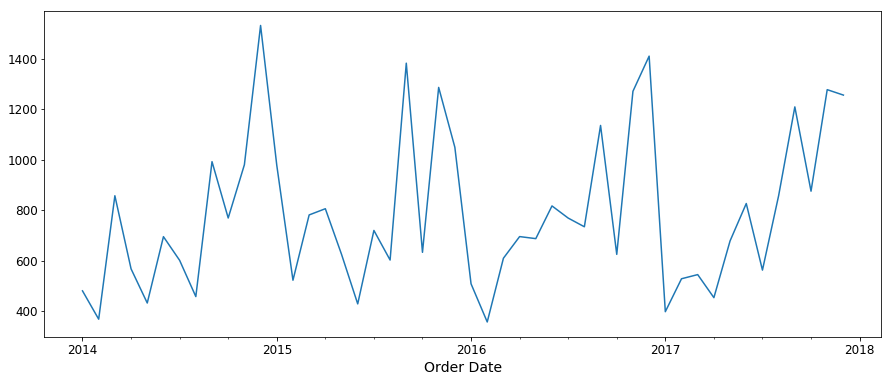

In [38]:
# Plot the to visualize time series data

y.plot(figsize=(15, 6))
plt.show()

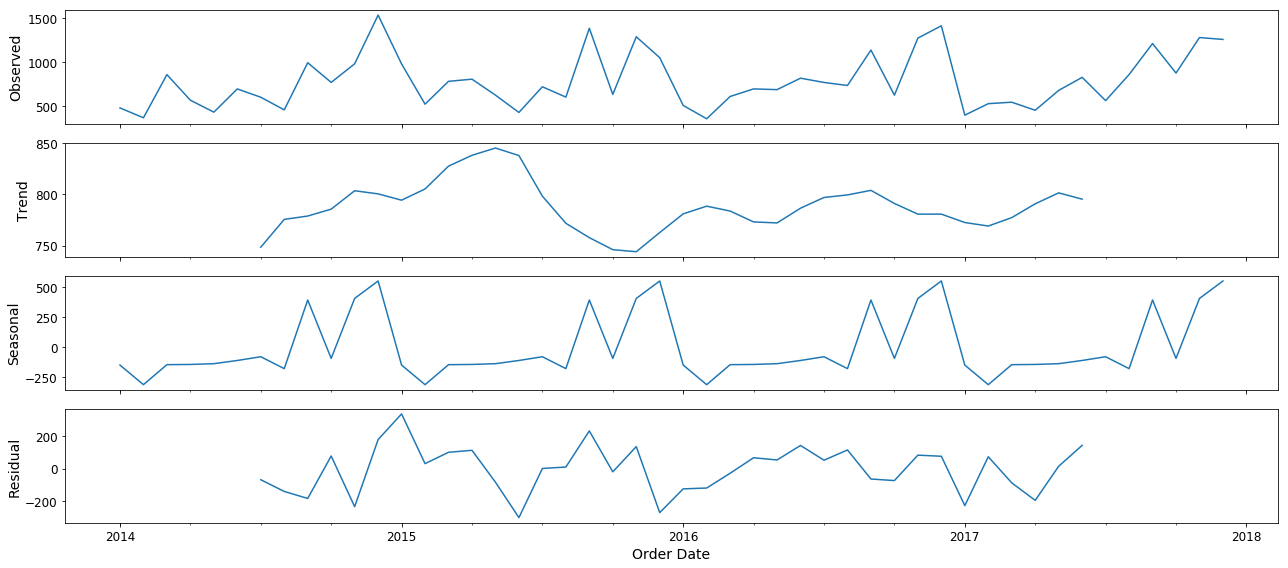

In [39]:
# Use decomposition method to visualize the various components of time series data

from pylab import rcParams

rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

<h1> Time Series Modelling with ARIMA </h1>

In [43]:
import itertools


p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...\n')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...

SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [49]:
# Perform Grid Search to find optimal parameters for ARIMA

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA {} x {} X 12 - AIC:{}'.format(param, param_seasonal, np.round(results.aic,2)))
        except:
            continue

ARIMA (0, 0, 0) x (0, 0, 0, 12) X 12 - AIC:769.08
ARIMA (0, 0, 0) x (0, 0, 1, 12) X 12 - AIC:1576.73
ARIMA (0, 0, 0) x (0, 1, 0, 12) X 12 - AIC:477.72
ARIMA (0, 0, 0) x (1, 0, 0, 12) X 12 - AIC:497.23
ARIMA (0, 0, 0) x (1, 0, 1, 12) X 12 - AIC:1478.13
ARIMA (0, 0, 0) x (1, 1, 0, 12) X 12 - AIC:318.0
ARIMA (0, 0, 1) x (0, 0, 0, 12) X 12 - AIC:720.93
ARIMA (0, 0, 1) x (0, 0, 1, 12) X 12 - AIC:2786.72
ARIMA (0, 0, 1) x (0, 1, 0, 12) X 12 - AIC:466.56
ARIMA (0, 0, 1) x (1, 0, 0, 12) X 12 - AIC:499.59
ARIMA (0, 0, 1) x (1, 0, 1, 12) X 12 - AIC:2768.43
ARIMA (0, 0, 1) x (1, 1, 0, 12) X 12 - AIC:319.99
ARIMA (0, 1, 0) x (0, 0, 0, 12) X 12 - AIC:677.89
ARIMA (0, 1, 0) x (0, 0, 1, 12) X 12 - AIC:1378.55
ARIMA (0, 1, 0) x (0, 1, 0, 12) X 12 - AIC:486.64
ARIMA (0, 1, 0) x (1, 0, 0, 12) X 12 - AIC:497.79
ARIMA (0, 1, 0) x (1, 0, 1, 12) X 12 - AIC:1022.86
ARIMA (0, 1, 0) x (1, 1, 0, 12) X 12 - AIC:319.77
ARIMA (0, 1, 1) x (0, 0, 0, 12) X 12 - AIC:649.91
ARIMA (0, 1, 1) x (0, 0, 1, 12) X 12 - AIC:32

In [51]:
# From the above results """ARIMA (1, 1, 1) x (1, 1, 0, 12) X 12 - AIC:297.79""" gives the mimimum AIC value

mod = sm.tsa.statespace.SARIMAX(y,order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0146      0.342      0.043      0.966      -0.655       0.684
ma.L1         -1.0000      0.360     -2.781      0.005      -1.705      -0.295
ar.S.L12      -0.0253      0.042     -0.609      0.543      -0.107       0.056
sigma2      2.958e+04   1.22e-05   2.43e+09      0.000    2.96e+04    2.96e+04


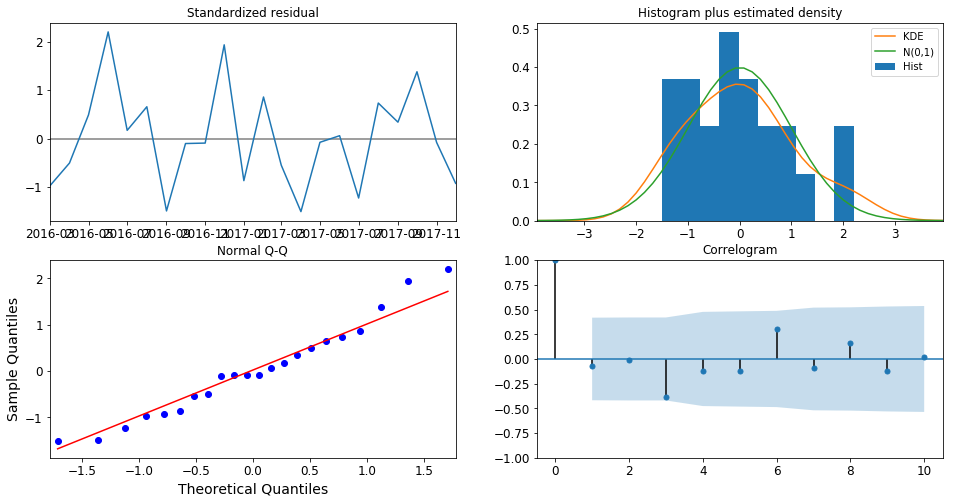

In [52]:
# Run model diagonstics

results.plot_diagnostics(figsize=(16, 8))
plt.show()

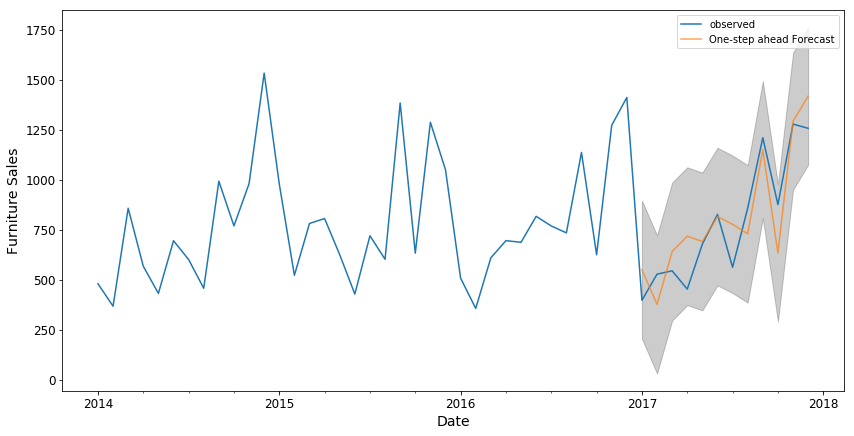

In [53]:
# Validating forecasts

pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [58]:
# Evaluating the model

y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The MSE of our forecast is: {}'.format(round(mse, 2)))

print('The RMSE of our forecasts is: {}'.format(round(np.sqrt(mse), 2)))

The MSE of our forecast is: 22993.57
The RMSE of our forecasts is: 151.64


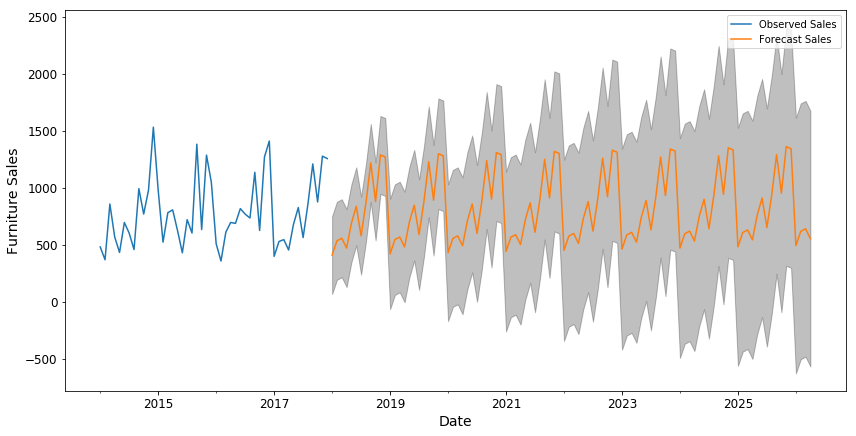

In [60]:
# Producing and visualizing forecasts

pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='Observed Sales', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast Sales')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()